In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import sklearn
import os
import time
import sys
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)

for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=4, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [31]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(55000, 28, 28) (55000,)
(5000, 28, 28) (5000,)
(10000, 28, 28) (10000,)


In [34]:
print(np.max(x_train), np.min(x_train))

255 0


In [33]:
# x = (x-u) / std

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [ ]:
print(np.max(x_train_scaled), np.min(x_train_scaled))

In [38]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# reason for sparse: y is index use sparse, y is one_hot vector use categorical_crossentropy
model.compile(loss='sparse_categorical_crossentropy',
             optimiser='sgd',
             metrics=['accuracy'])

In [40]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                   validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 13s 229us/sample - loss: 0.4898 - accuracy: 0.8245 - val_loss: 66.7395 - val_accuracy: 0.7800
Epoch 2/10
55000/55000 [==============================] - 10s 183us/sample - loss: 0.3916 - accuracy: 0.8615 - val_loss: 191.7740 - val_accuracy: 0.7474
Epoch 3/10
55000/55000 [==============================] - 11s 193us/sample - loss: 0.3685 - accuracy: 0.8741 - val_loss: 159.3333 - val_accuracy: 0.8264
Epoch 4/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.3519 - accuracy: 0.8786 - val_loss: 317.6738 - val_accuracy: 0.7824
Epoch 5/10
55000/55000 [==============================] - 11s 207us/sample - loss: 0.3404 - accuracy: 0.8861 - val_loss: 323.0839 - val_accuracy: 0.8058
Epoch 6/10
55000/55000 [==============================] - 11s 197us/sample - loss: 0.3336 - accuracy: 0.8899 - val_loss: 520.5031 - val_accuracy: 0.7724
Epoch 7/10
55000/55000 [==========

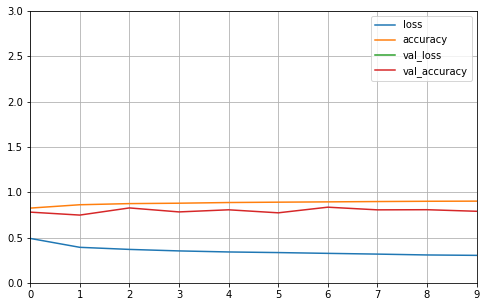

In [41]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

plot_learning_curves(history)

In [ ]:
model.evaluate(x_test_scaled, y_test)